In [24]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [37]:
credit_df = pd.read_csv("default of credit card clients.csv")
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [39]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [40]:
credit_df.drop_duplicates(inplace=True)

In [41]:
credit_df.drop(columns=['ID'], inplace=True)

In [42]:
credit_df = credit_df[credit_df["EDUCATION"] > 0]
credit_df = credit_df[credit_df["MARRIAGE"] > 0]
credit_df = credit_df[credit_df["PAY_1"] != -2]
credit_df = credit_df[credit_df["PAY_2"] != -2]
credit_df = credit_df[credit_df["PAY_3"] != -2]
credit_df = credit_df[credit_df["PAY_4"] != -2]
credit_df = credit_df[credit_df["PAY_5"] != -2]
credit_df = credit_df[credit_df["PAY_6"] != -2]

In [43]:
credit_df.skew(numeric_only=True)

LIMIT_BAL     1.142362
SEX          -0.375018
EDUCATION     0.903241
MARRIAGE     -0.002689
AGE           0.744786
PAY_1         1.632391
PAY_2         1.486875
PAY_3         1.649479
PAY_4         2.067816
PAY_5         2.262348
PAY_6         2.114155
BILL_AMT1     2.438907
BILL_AMT2     2.477722
BILL_AMT3     2.475608
BILL_AMT4     2.576928
BILL_AMT5     2.640086
BILL_AMT6     2.604396
PAY_AMT1     15.447839
PAY_AMT2     24.711461
PAY_AMT3     18.281115
PAY_AMT4     14.004952
PAY_AMT5     11.321081
PAY_AMT6     11.251552
dpnm          1.282791
dtype: float64

In [44]:
# Checking outliers using IQR method
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
    return outliers

In [45]:
selected_columns = credit_df[["LIMIT_BAL"]]
for col in selected_columns:
    out = outliers(credit_df, col)
    if len(out)>0:
        print("Outliers found in",col,"and the count is",len(out))
    else:
        print("No outlier found in", col)

Outliers found in LIMIT_BAL and the count is 774


In [46]:
credit_df.drop(out.index, inplace = True)

In [47]:
credit_df.shape

(22619, 24)

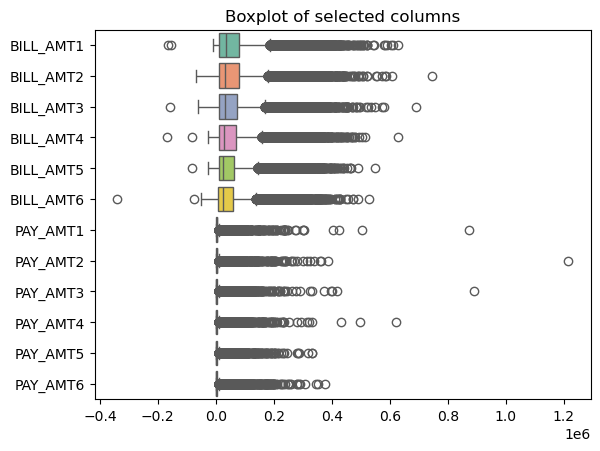

In [48]:
selected_columns = credit_df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6","PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]
sns.boxplot(data=selected_columns, orient="h", palette="Set2")
plt.title("Boxplot of selected columns")
plt.show()    

In [49]:
from scipy.stats import mstats
for col in selected_columns:
    credit_df[col] = mstats.winsorize(credit_df[col], limits=[0.05, 0.05])  #capping the 5th and 95th percentile values

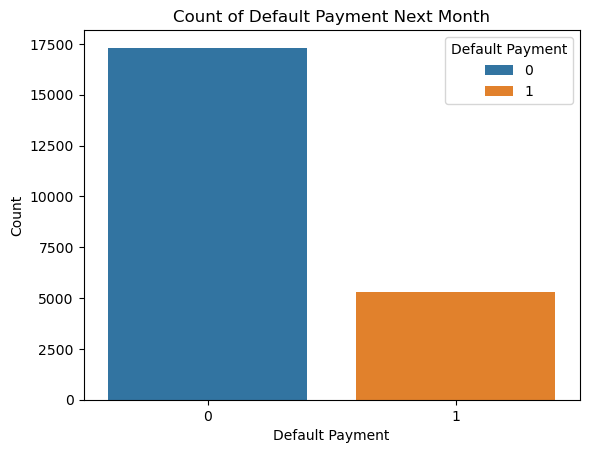

In [51]:
sns.countplot(x='dpnm', data=credit_df, hue='dpnm')
plt.title('Count of Default Payment Next Month')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Default Payment', loc='upper right')
plt.show()

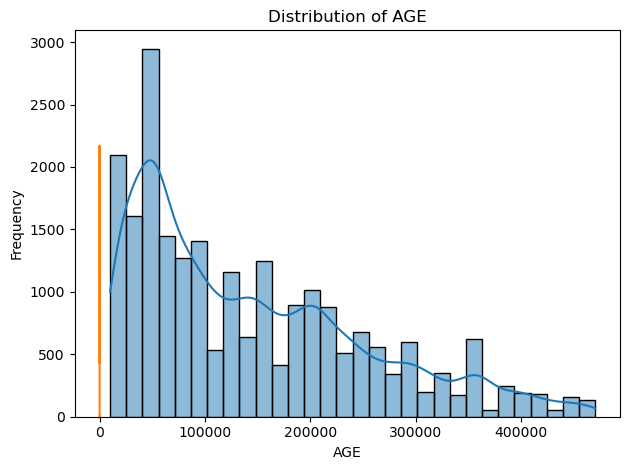

In [ ]:
sns.histplot(credit_df.LIMIT_BAL, kde=True, bins=30)
plt.title('Distribution of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')
plt.show()

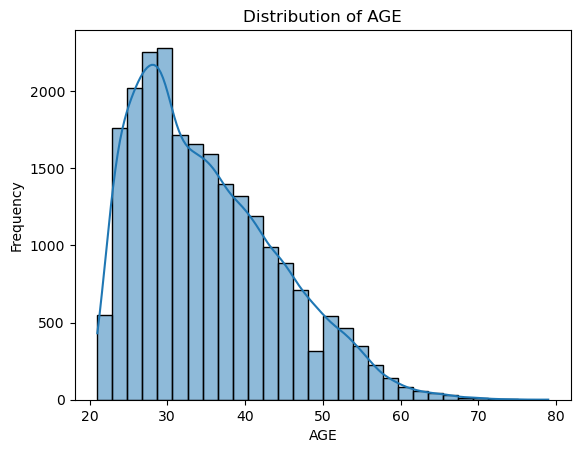

In [ ]:
sns.histplot(credit_df.AGE, kde=True, bins=30)
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

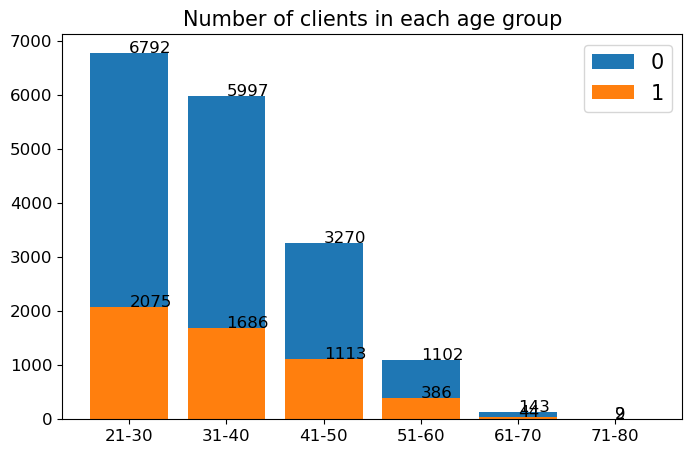

In [57]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
credit_df['AGE_BIN'] = pd.cut(x=credit_df.AGE, bins=bins, labels=names, right=True)

age_cnt = credit_df.AGE_BIN.value_counts()
age_0 = (credit_df.AGE_BIN[credit_df['dpnm'] == 0].value_counts())
age_1 = (credit_df.AGE_BIN[credit_df['dpnm'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

ValueError: operands could not be broadcast together with shapes (9,) (10,) 

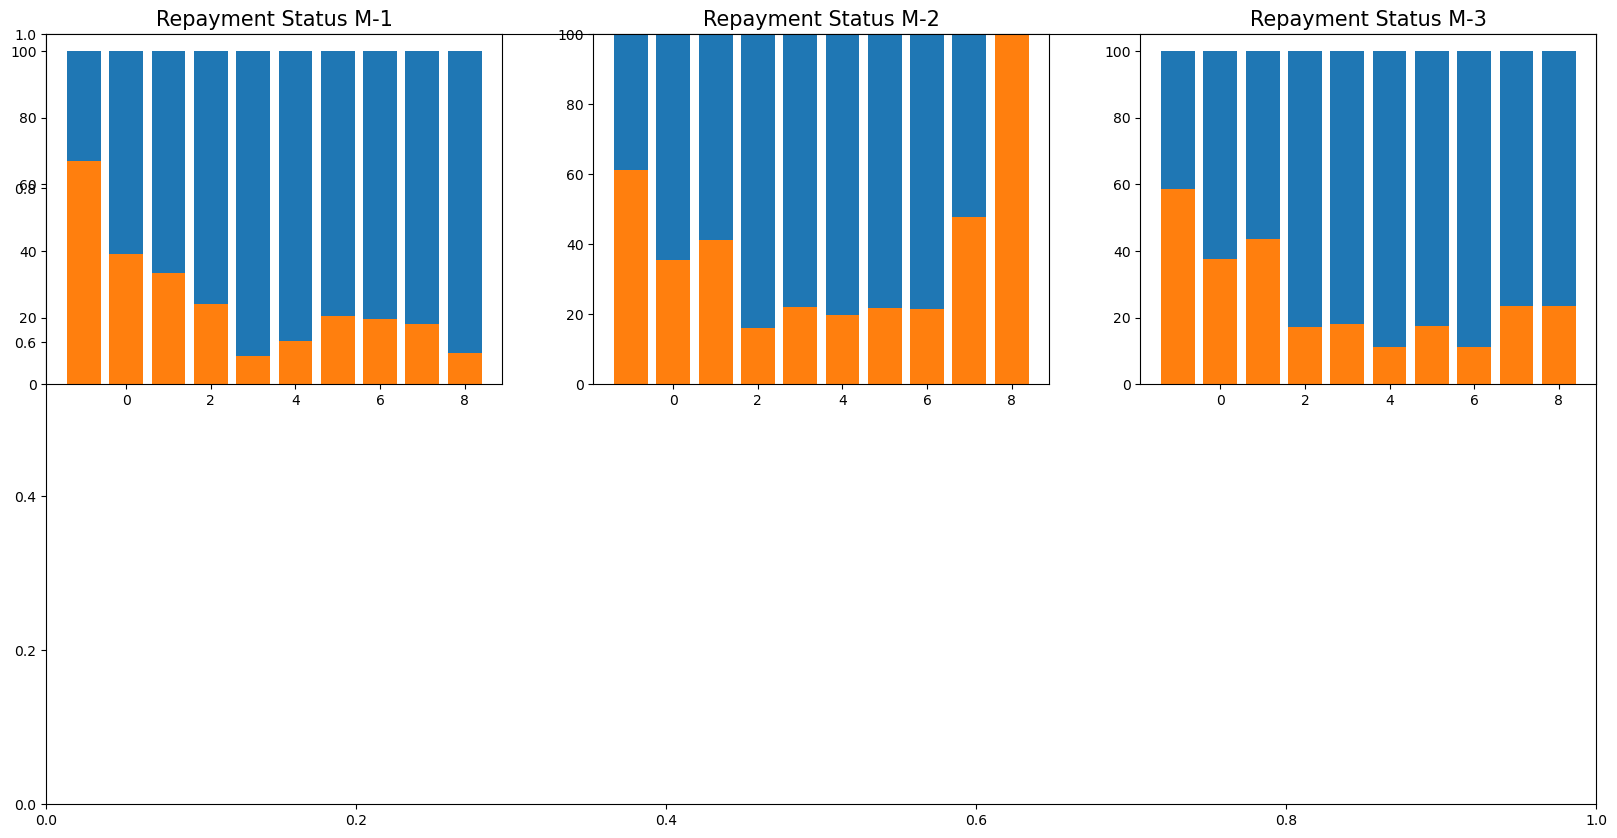

In [58]:
plt.subplots(figsize=(20,10))

ind = sorted(credit_df.PAY_1.unique())
pay_0 = (credit_df.PAY_1[credit_df['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (credit_df.PAY_1[credit_df['dpnm'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(credit_df.PAY_2.unique())
pay_0 = (credit_df.PAY_2[credit_df['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (credit_df.PAY_2[credit_df['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(credit_df.PAY_3.unique())
pay_0 = (credit_df.PAY_3[credit_df['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (credit_df.PAY_3[credit_df['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(credit_df.PAY_4.unique())
pay_0 = (credit_df.PAY_4[credit_df['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (credit_df.PAY_4[credit_df['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(credit_df.PAY_5.unique())
pay_0 = (credit_df.PAY_5[credit_df['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (credit_df.PAY_5[credit_df['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

ind = sorted(credit_df.PAY_6.unique())
pay_0 = (credit_df.PAY_6[credit_df['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (credit_df.PAY_6[credit_df['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-6", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()